### Calculate Principal Component Analysis(PCA) using numpy

In [1]:
# Lets create the Matrix
import numpy as np
M = np.array([[2,4,3,4,5,8],[1,3,5,7,4,3],[6,5,8,9,3,7],[5,8,3,9,2,5],[2,4,7,3,6,4]])

In [2]:
M

array([[2, 4, 3, 4, 5, 8],
       [1, 3, 5, 7, 4, 3],
       [6, 5, 8, 9, 3, 7],
       [5, 8, 3, 9, 2, 5],
       [2, 4, 7, 3, 6, 4]])

In [3]:
M.shape

(5, 6)

In [4]:
col = M.shape[1]
col

6

In [5]:
#To calculate mean of each columns in Matrix
mean_column = np.mean(M,axis=0)

In [6]:
mean_column

array([3.2, 4.8, 5.2, 6.4, 4. , 5.4])

In [7]:
# Find the centered Matrix
M_new = mean_column -M

In [8]:
M_new

array([[ 1.2,  0.8,  2.2,  2.4, -1. , -2.6],
       [ 2.2,  1.8,  0.2, -0.6,  0. ,  2.4],
       [-2.8, -0.2, -2.8, -2.6,  1. , -1.6],
       [-1.8, -3.2,  2.2, -2.6,  2. ,  0.4],
       [ 1.2,  0.8, -1.8,  3.4, -2. ,  1.4]])

In [9]:
np.round(M_new.mean(),2)

0.0

Now We will find the covariance matrix of the dataset by multiplying the matrix of features by its transpose. It is a measure of how much each of the dimensions varies from the mean with respect to each other. Covariance matrices, like correlation matrices, contain information about the amount of variance shared between pairs of variables.

In [10]:
# Calcultae the Covariance Matrix of centered Matrix
M_cov = np.cov(M_new.T)

In [11]:
M_cov

array([[ 4.7 ,  3.05,  1.2 ,  4.4 , -2.5 ,  1.9 ],
       [ 3.05,  3.7 , -1.45,  3.1 , -2.25,  0.6 ],
       [ 1.2 , -1.45,  5.2 ,  0.15,  0.75, -0.6 ],
       [ 4.4 ,  3.1 ,  0.15,  7.8 , -4.25,  0.05],
       [-2.5 , -2.25,  0.75, -4.25,  2.5 , -0.25],
       [ 1.9 ,  0.6 , -0.6 ,  0.05, -0.25,  4.3 ]])

In [12]:
M_cov.shape

(6, 6)

In [13]:
# Calcultae the Eigen Value and Eigen Vector using eigendecomposition
E_val,E_vec = np.linalg.eig(M_cov)

In [14]:
eigen_value = np.round(E_val,4)
eigen_value

array([15.3713,  6.099 ,  4.8848,  1.8449, -0.    , -0.    ])

In [15]:
eigen_vector = np.round(E_vec,4)
eigen_vector

array([[ 0.494 ,  0.1896,  0.3393,  0.3011,  0.4396,  0.0738],
       [ 0.3889, -0.2675,  0.006 ,  0.7134, -0.4143, -0.1875],
       [-0.0229,  0.91  ,  0.1515,  0.1267, -0.1349,  0.064 ],
       [ 0.6637,  0.1316, -0.314 , -0.4891, -0.4247, -0.4424],
       [-0.3867,  0.0837,  0.1557,  0.1471, -0.6336, -0.8705],
       [ 0.1188, -0.2004,  0.8597, -0.3515, -0.1871, -0.043 ]])

#### How many Principal components we should select ?
1. Elbow method : Visualize the eigenvalues in order from highest to lowest, connecting them with a line. Upon visual inspection, keep all the components whose eigenvalue falls above the point where the slope of the line changes the most drastically

2. Explained Variance Method : Only keep Principal components that explain at least 90% of the variance in the data.


#### Explained Variance Method

In [16]:
# Selecting the Principal Components Using the Explained Variance
explained_variance = []
for i in eigen_value:
    explained_variance.append((i/np.sum(eigen_value))*100)

In [17]:
explained_variance

[54.508156028368795,
 21.627659574468087,
 17.32198581560284,
 6.542198581560283,
 -0.0,
 -0.0]

In [18]:
cum_explained_variance = np.cumsum(explained_variance)
cum_explained_variance

array([ 54.50815603,  76.1358156 ,  93.45780142, 100.        ,
       100.        , 100.        ])

If I use the 1st variable it will explain 54.50% of the data and if I use 3 variables I will be able to capture 90% of the data. If I use all features it will describe the entire dataset. So we can select 3 variables.

#### Elbow Method

In [19]:
import matplotlib.pyplot as plt

In [20]:
X = [i for i in range(1,col+1)]
X

[1, 2, 3, 4, 5, 6]

In [21]:
Y = np.cumsum(explained_variance)/100
Y

array([0.54508156, 0.76135816, 0.93457801, 1.        , 1.        ,
       1.        ])

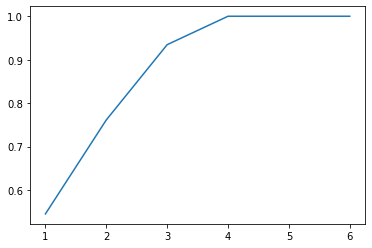

In [22]:
plt.plot(X,Y)

#### Transformed data in a new subspace or we can say lower Dimentional space
 I will compute the PCA transformation on the original dataset, getting the dot product of the original dataset and the eigenvectors that I got from the eigendecomposition.

In [23]:
M_transformed = (np.round(E_vec[:,:].T.dot(M_new.T),4)).T
print(M_transformed)

[[ 2.5243  2.7687 -2.3993  0.8037 -0.     -0.    ]
 [ 1.6692 -0.4421  3.0392  1.4218 -0.      0.    ]
 [-3.6994 -2.9632 -1.7787  0.6404 -0.     -0.    ]
 [-4.6356  2.2615  1.175  -1.1207 -0.     -0.    ]
 [ 4.1416 -1.6248 -0.0362 -1.7452  0.      0.    ]]


In [24]:
M_transformed_1 = (np.round(E_vec[:,0:4].T.dot(M_new.T),4)).T
print(M_transformed_1)

[[ 2.5243  2.7687 -2.3993  0.8037]
 [ 1.6692 -0.4421  3.0392  1.4218]
 [-3.6994 -2.9632 -1.7787  0.6404]
 [-4.6356  2.2615  1.175  -1.1207]
 [ 4.1416 -1.6248 -0.0362 -1.7452]]


### Calculate Principal Component Analysis(PCA) using sklearn

In [25]:
import numpy as np
from sklearn.decomposition import PCA

In [26]:
# Create the PCA object
pca = PCA()

In [27]:
#training or instantiation
pca.fit(M)

PCA()

In [28]:
pca.components_

array([[ 0.49399805,  0.38889072, -0.02289535,  0.66372284, -0.3867281 ,
         0.11882385],
       [ 0.18962804, -0.26745987,  0.90996748,  0.13158   ,  0.08365377,
        -0.20038552],
       [-0.33927295, -0.00604427, -0.15147588,  0.31399745, -0.15573445,
        -0.85968876],
       [ 0.30113109,  0.71336071,  0.12671721, -0.48908215,  0.14712719,
        -0.35147057],
       [-0.55876391,  0.30356234,  0.33555631, -0.16219928, -0.64036192,
         0.21601565]])

In [29]:
np.round(pca.explained_variance_,4)

array([15.3713,  6.099 ,  4.8848,  1.8449,  0.    ])

In [30]:
np.round(pca.explained_variance_ratio_,4)

array([0.5451, 0.2163, 0.1732, 0.0654, 0.    ])

In [31]:
X1 = [i for i in range(1,col)]
X1

[1, 2, 3, 4, 5]

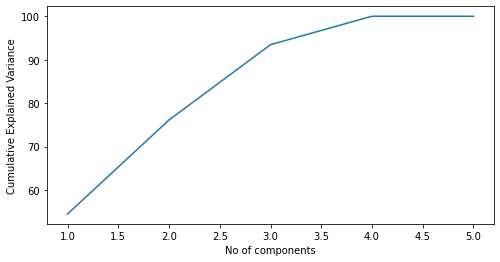

In [32]:
plt.figure(figsize= (8,4))
plt.plot(X1,np.cumsum(pca.explained_variance_ratio_*100))
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("No of components")
plt.show()

In [33]:
# Create the PCA object with selected Principal component
pca_trans = PCA(n_components=4)

In [34]:
pca_trans.fit(M)

PCA(n_components=4)

In [35]:
# New Feature space
M_transform_sk = pca_trans.transform(M)

In [36]:
np.round(M_transform_sk,4)

array([[-2.5243, -2.7687, -2.3993, -0.8037],
       [-1.6692,  0.4421,  3.0392, -1.4218],
       [ 3.6994,  2.9632, -1.7787, -0.6404],
       [ 4.6356, -2.2615,  1.175 ,  1.1207],
       [-4.1416,  1.6248, -0.0362,  1.7452]])

In [37]:
M_transformed_1

array([[ 2.5243,  2.7687, -2.3993,  0.8037],
       [ 1.6692, -0.4421,  3.0392,  1.4218],
       [-3.6994, -2.9632, -1.7787,  0.6404],
       [-4.6356,  2.2615,  1.175 , -1.1207],
       [ 4.1416, -1.6248, -0.0362, -1.7452]])

In [38]:
np.round(pca.singular_values_,4)

array([7.8413, 4.9392, 4.4203, 2.7165, 0.    ])

In [39]:
pca.svd_solver

'auto'

### Apply the PCA on Cardiac health UCI Library Dataset

In [40]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spect/SPECTF.test"

In [41]:
### Dataset does not have column name mentioned so we need to manually add the column name while importing the data
col_name = ['target', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df = pd.read_table(url,delimiter=",",names=col_name)

In [44]:
df.head()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,67,68,73,78,65,63,67,60,63,...,61,56,76,75,74,77,76,74,59,68
1,1,75,74,71,71,62,58,70,64,71,...,66,62,68,69,69,66,64,58,57,52
2,1,83,64,66,67,67,74,74,72,64,...,67,64,69,63,68,54,65,64,43,42
3,1,72,66,65,65,64,61,71,78,73,...,69,68,68,63,71,72,65,63,58,60
4,1,62,60,69,61,63,63,70,68,70,...,66,66,58,56,72,73,71,64,49,42


In [45]:
df.shape

(187, 45)

<AxesSubplot:>

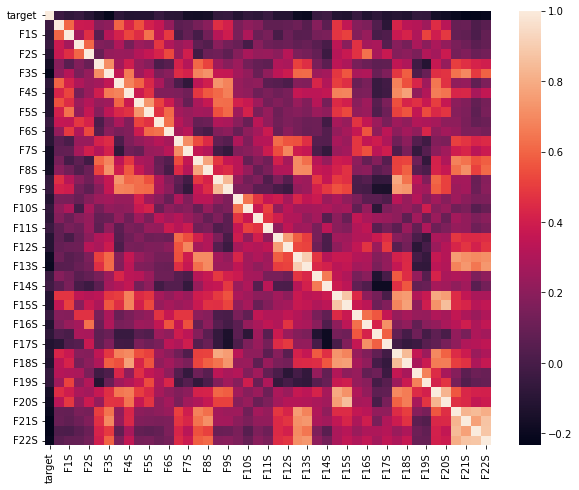

In [46]:
# check co-relation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())

In [47]:
# PCA is unsupervised Algorithm so we will remove the target variable from the dataset
y = df["target"]
y.shape

(187,)

In [48]:
X = df.drop("target",axis=1)

In [49]:
X.shape

(187, 44)

In [50]:
# PCA we perform on contineous dataset and as we check the principal component which maximize the variance
# It means which can explain most of the variance in the dataset so as we use variance in PCA so we first standardize the datatset
# We will check the data distribution

In [51]:
X_col_name = col_name
X_col_name.remove("target")

In [52]:
type(X_col_name)

list

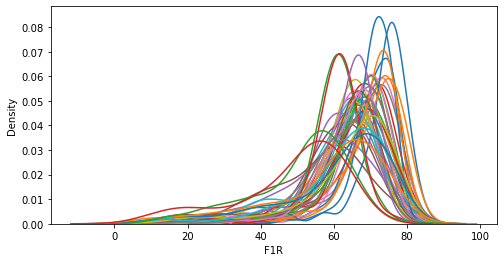

In [53]:
plt.figure(figsize=(8,4))
for i in X_col_name:
    sns.kdeplot(X[i])

In [54]:
# Seems like data had gaussian distribution , so we can scale our data using standardizaton

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
stdscaler = StandardScaler()

In [57]:
X_scale = stdscaler.fit_transform(X)

In [58]:
print(X_scale.shape)
print(type(X_scale))

(187, 44)
<class 'numpy.ndarray'>


In [59]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [60]:
print(np.round(X_scale.mean(),4))
print(np.round(X.to_numpy().mean(),4))

-0.0
63.7307


In [61]:
df_scale = pd.DataFrame(X_scale,columns=X_col_name)

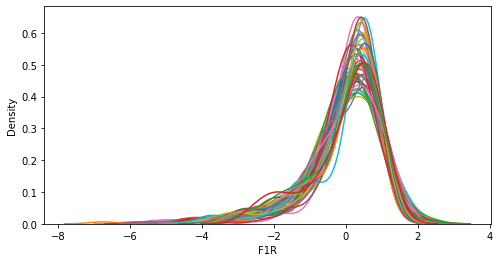

In [62]:
plt.figure(figsize=(8,4))
for i in X_col_name:
    sns.kdeplot(df_scale[i])

#### Apply the PCA

In [63]:
from sklearn.decomposition import PCA

In [64]:
pca = PCA()

In [65]:
pca.fit(X_scale)

PCA()

In [66]:
eigen_values = pca.explained_variance_
eigen_values

array([14.34562074,  5.83681585,  4.42162892,  2.34332289,  1.80650522,
        1.55240242,  1.45319376,  1.36726928,  1.29681023,  1.09713609,
        0.90936507,  0.7917635 ,  0.71012602,  0.65566146,  0.55558117,
        0.52786403,  0.46792461,  0.40259812,  0.33576864,  0.31605158,
        0.29306647,  0.28413263,  0.24971262,  0.23242124,  0.19851243,
        0.18062938,  0.17242752,  0.16469028,  0.15106954,  0.13134794,
        0.12212081,  0.11471285,  0.10372077,  0.09271628,  0.08059425,
        0.07867202,  0.07363336,  0.06858027,  0.05356435,  0.04941072,
        0.04523983,  0.04274213,  0.03500209,  0.02442975])

In [67]:
eigen_vectors = pca.components_
eigen_vectors

array([[-0.11996681, -0.12479925, -0.08948385, ..., -0.1880824 ,
        -0.15196636, -0.17083357],
       [-0.17769274, -0.1913285 , -0.03660356, ...,  0.18124222,
         0.21123126,  0.20342982],
       [-0.09942534, -0.1593253 , -0.21148644, ...,  0.12396717,
         0.09812765,  0.1036532 ],
       ...,
       [-0.14041787,  0.10898007, -0.00995677, ...,  0.25701764,
        -0.01590751, -0.05663753],
       [ 0.01592636, -0.03068441,  0.01762179, ..., -0.25061049,
        -0.24475524,  0.35592682],
       [-0.00610308,  0.03089461,  0.08121487, ...,  0.06576717,
        -0.01677834,  0.06555894]])

In [68]:
print(type(eigen_vectors))
print(type(eigen_values))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [69]:
print(eigen_vectors.shape)
print(eigen_values.shape)

(44, 44)
(44,)


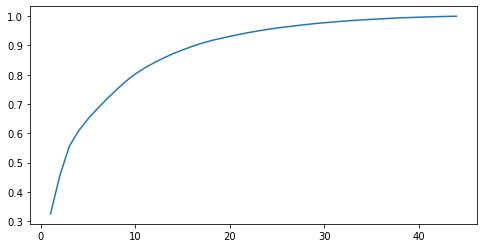

In [70]:
# select principal component
plt.figure(figsize=(8,4))
#plt.style.use('fivethirtyeight')
plt.plot(range(1,45),np.cumsum(pca.explained_variance_ratio_))

In [71]:
table = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_),columns=["sum"])

In [72]:
table.index +=1
table

,sum
1,0.324293
2,0.456239
3,0.556193
4,0.609166
5,0.650003
6,0.685096
7,0.717947
8,0.748855
9,0.778170
10,0.802972


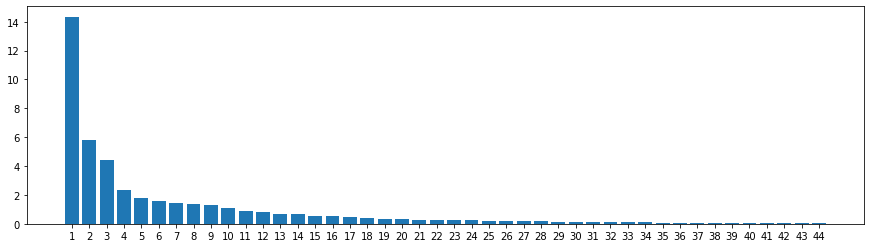

In [73]:
plt.figure(figsize=(15,4))
plt.bar(range(1,45),pca.explained_variance_)
plt.xticks(range(1,45))
plt.show()

In [74]:
# lets select Principal Component 17, which can explain 90% of the data
pca_17 = PCA(n_components=17)

In [75]:
X_transformed = pca_17.fit_transform(X_scale)

In [76]:
print(type(X_transformed))
print(X_transformed.shape)

<class 'numpy.ndarray'>
(187, 17)


<AxesSubplot:>

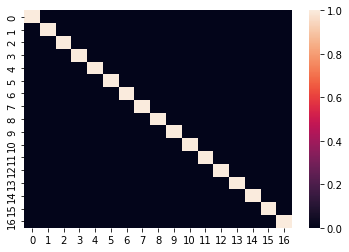

In [77]:
# lets check the co-relation
plt.figure(figsize=(6,4))
sns.heatmap(pd.DataFrame(X_transformed).corr())

Principal components now don't have any co-relation

### Apply PCA with train test split and prepare classsification model

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df_wine = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/wine_quality/winequality.csv")

In [80]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [81]:
## Find number of wines that classify as Good or bad
df_wine.good.value_counts()

0    5220
1    1277
Name: good, dtype: int64

<AxesSubplot:>

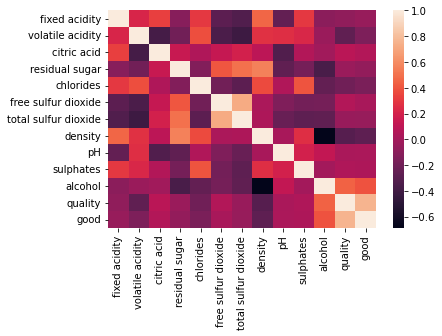

In [82]:
## Lets plot the heatmap to find the correlation between variables.
plt.figure(figsize=(6,4))
sns.heatmap(df_wine.corr())

In [83]:
df_wine.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [84]:
# convert column "color" into numerical
df_wine.color.replace(["red","white"],[0,1],inplace=True)

In [85]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,0


In [86]:
X_wine = df_wine.drop("good",axis=1)

In [87]:
y_wine = df_wine["good"]

In [88]:
print(X_wine.shape)
print(y_wine.shape)
print(type(X_wine))
print(type(y_wine))

(6497, 13)
(6497,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [89]:
# Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_wine,y_wine,test_size=0.40,random_state=42)

In [90]:
print(X_train.shape)
print(X_test.shape)
print(type(X_train))
print(type(X_test))

(3898, 13)
(2599, 13)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [91]:
print(y_train.shape)
print(y_test.shape)
print(type(y_train))
print(type(y_test))

(3898,)
(2599,)
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [92]:
#wine_cols = [i for i in X_wine.columns]
#wine_cols

In [93]:
X_wine.to_numpy().mean()

13.957792306863524

In [94]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
#scale.fit(X_train)

In [95]:
# transform the training dataset
#X_train_scale = scale.transform(X_train)
X_train_scale = scale.fit_transform(X_train)

In [96]:
# transform the test dataset
X_test_scale = scale.transform(X_test)

In [97]:
np.round(X_train_scale.mean(),4)

0.0

In [98]:
# Apply the PCA

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca_wine_train_scale = PCA()
pca_wine_train_scale.fit(X_train_scale)

PCA()

In [101]:
# Eigen Values
pca_wine_train_scale.explained_variance_

array([3.83374849, 2.63140142, 1.67549649, 1.08136193, 0.85680384,
       0.66646993, 0.57291783, 0.51470835, 0.4699232 , 0.30259377,
       0.25731622, 0.11484843, 0.02574599])

In [102]:
pca_wine_train_scale.explained_variance_ratio_

array([0.29482807, 0.20236357, 0.12885128, 0.08316035, 0.06589108,
       0.05125377, 0.0440593 , 0.03958279, 0.03613867, 0.02327047,
       0.01978848, 0.00883223, 0.00197995])

In [103]:
np.cumsum(pca_wine_train_scale.explained_variance_ratio_)

array([0.29482807, 0.49719164, 0.62604292, 0.70920327, 0.77509435,
       0.82634811, 0.87040741, 0.9099902 , 0.94612887, 0.96939934,
       0.98918782, 0.99802005, 1.        ])

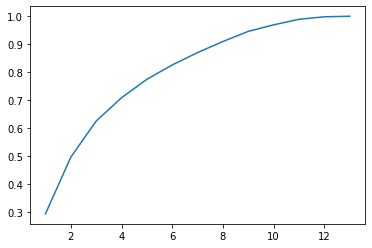

In [104]:
plt.plot(range(1,14),np.cumsum(pca_wine_train_scale.explained_variance_ratio_))

In [105]:
# we will select 9 principal components
# Again apply the PCA using 9 Principal components
pca_wine_train_scale_9 = PCA(n_components=9)
#pca_wine_train_scale_9.fit(X_train_scale)

In [106]:
# Transform the training dataset in a new feature space
#X_train_scale_pca_9 = pca_wine_train_scale_9.transform(X_train_scale)
X_train_scale_pca_9 = pca_wine_train_scale_9.fit_transform(X_train_scale)

In [107]:
# Transform the testing dataset in a new feature space
X_test_scale_pca_9 = pca_wine_train_scale_9.transform(X_test_scale)

In [108]:
# Apply Random Forest Classifier and KNN Classifier without PCA

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [110]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [111]:
knncf = KNeighborsClassifier()
knncf.fit(X_train,y_train)

KNeighborsClassifier()

In [112]:
from sklearn import metrics

In [113]:
y_pred_rf = rfc.predict(X_test)

In [114]:
y_pred_knn = knncf.predict(X_test)

In [115]:
# score on test dataset using rf
metrics.accuracy_score(y_test,y_pred_rf)

1.0

In [116]:
# score on test dataset using knn
metrics.accuracy_score(y_test,y_pred_knn)

0.8391689111196614

In [117]:
# Apply Random Forest Classifier with PCA

In [118]:
rfc_pca = RandomForestClassifier()
rfc_pca.fit(X_train_scale_pca_9,y_train)

RandomForestClassifier()

In [119]:
knncf_pca = KNeighborsClassifier()
knncf_pca.fit(X_train_scale_pca_9,y_train)

KNeighborsClassifier()

In [120]:
y_pred_pca_rf_9 = rfc_pca.predict(X_test_scale_pca_9)

In [121]:
y_pred_pca_knn_9 = knncf_pca.predict(X_test_scale_pca_9)

In [122]:
# score on test dataset using rfc_pca
metrics.accuracy_score(y_test,y_pred_pca_rf_9)

0.9823008849557522

In [123]:
# score on test dataset using rfc_pca
metrics.accuracy_score(y_test,y_pred_pca_knn_9)

0.981531358214698